In [179]:
## Import dependencies
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import scripts.theodolite_utils as theodo_u
import scripts.theodolite_plot_function as theodo_p
import scripts.groundtruth_utils as theodo_g
import random
import pandas as pd
from numpy import linalg
import importlib
theodo_u = importlib.reload(theodo_u)
theodo_p = importlib.reload(theodo_p)

In [180]:
## Import files
theodo_u = importlib.reload(theodo_u)

file_0 = "/home/effie/Model/model_MC_0_0_0_0_0.csv"
file_1 = "/home/effie/Model/model_MC_1_0_0_0_0.csv"
file_2 = "/home/effie/Model/model_MC_0_1_0_0_0.csv"
file_3 = "/home/effie/Model/model_MC_0_0_1_0_0.csv"
file_4 = "/home/effie/Model/model_MC_0_0_0_1_0.csv"
file_5 = "/home/effie/Model/model_MC_1_1_1_1_0.csv"

Data_0 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_0)
Data_1 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_1)
Data_2 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_2)
Data_3 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_3)
Data_4 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_4)
Data_5 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_5)


In [181]:
## Creating Data Frames
theodo_u = importlib.reload(theodo_u)

Data_total = [Data_0,Data_1,Data_2,Data_3,Data_4,Data_5]


df_0 = pd.DataFrame(data=Data_0,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_1 = pd.DataFrame(data=Data_1,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_2 = pd.DataFrame(data=Data_2,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_3 = pd.DataFrame(data=Data_3,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_4 = pd.DataFrame(data=Data_4,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_5 = pd.DataFrame(data=Data_5,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])

In [182]:
## Frobenius norm for all data according to the model chosen and the range linked
def add_Frobenius(df):
    Distance_F = []
    for i,item in df.iterrows() :
        C = np.array(#Compute covariance matrix   
                [
                    [float(item['C1']), float(item['C2']), float(item['C3'])],
                    [float(item['C4']), float(item['C5']), float(item['C4'])],
                    [float(item['C7']), float(item['C8']), float(item['C9'])],
                ])
        Distance_F.append(1000*np.sqrt(theodo_u.Frobenius_norm(C, np.zeros((3,3)))))

    df['Frobenius_norm'] = Distance_F
    return df


In [183]:
## Adding Frobenius norm to Data Frames
df_0=add_Frobenius(df_0)
df_1=add_Frobenius(df_1)
df_2=add_Frobenius(df_2)
df_3=add_Frobenius(df_3)
df_4=add_Frobenius(df_4)
df_5=add_Frobenius(df_5)

In [184]:
## Sort distances
def sort_distance(df):
    # df.loc[df['distance'].between(0,25,'left'),'0 to 25 m'] = '0 to 25 m'
    # df.loc[df['distance'].between(25,75,'left'),'dist'] = '25 to 75 m'
    # df.loc[df['distance'].between(75,125,'left'),'dist'] = '75 to 125 m'
    # df.loc[df['distance'].between(125,200,'left'),'dist'] = '125 to 200 m'
    # df.loc[df['distance'].between(200,500,'left'),'dist'] = 'more than 200 m'
    df.loc[df['distance'].between(0,25,'left'),'0 to 25 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(25,75,'left'),'25 to 75 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(75,125,'left'),'75 to 125 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(125,200,'left'),'125 to 200 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(200,500,'left'),'more than 200 m'] = df['Frobenius_norm']
    return df

In [187]:
## Sort distances to Data Frames
df_0=sort_distance(df_0)
df_1=sort_distance(df_1)
df_2=sort_distance(df_2)
df_3=sort_distance(df_3)
df_4=sort_distance(df_4)
df_5=sort_distance(df_5)

In [188]:
def pandas_to_list(df):
    df_0_to_25 = []
    df_25_to_75 = []
    df_75_to_125 = []
    df_125_to_200 = []
    df_more_200 = []

    df_0_to_25 = df['0 to 25 m'].tolist()
    df_25_to_75 = df['25 to 75 m'].tolist()
    df_75_to_125 = df['75 to 125 m'].tolist()
    df_125_to_200 = df['125 to 200 m'].tolist()
    df_more_200 = df['more than 200 m'].tolist()

    D_1 = []
    for i in df_0_to_25:
        if np.isnan(i)!=True:
            D_1.append(float(i))
    D_2 = []
    for i in df_25_to_75:
        if np.isnan(i)!=True:
            D_2.append(float(i))
    D_3 = []
    for i in df_75_to_125:
        if np.isnan(i)!=True:
            D_3.append(float(i))
    D_4 = []
    for i in df_125_to_200:
        if np.isnan(i)!=True:
            D_4.append(float(i))
    D_5 = []
    for i in df_more_200:
        if np.isnan(i)!=True:
            D_5.append(float(i))
    return D_1,D_2,D_3,D_4,D_5

In [189]:
D_1, D_2, D_3, D_4, D_5 = pandas_to_list(df_0)

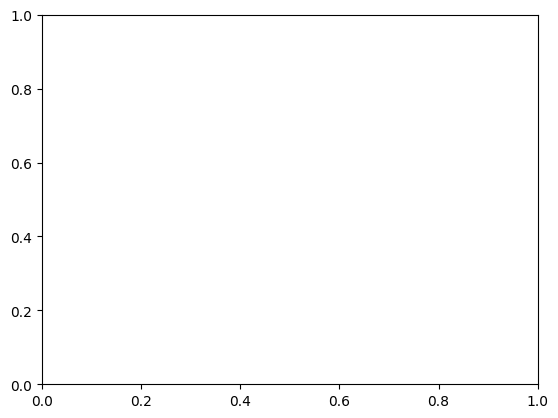

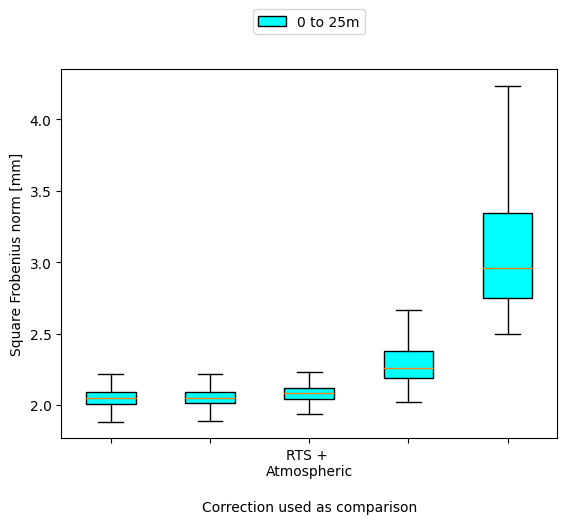

In [190]:
data = [D_1, D_2, D_3, D_4, D_5]

fig, ax = plt.subplots()
box = ax.boxplot(data, showfliers=False, notch=False, patch_artist=True)
ax.set_xticklabels(['', '', 'RTS + \nAtmospheric', '', '',
                    # '', '', 'RTS + \nAtmospheric', '', '',
                    # '', '', 'RTS + \nExtrinsic calib', '', '',
                    # '', '', 'RTS + \nTime synch', '', '',
                    # '', '', 'RTS + All', '', '',
])

colors = ['cyan', 'cyan', 'cyan', 'cyan', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# ax.vlines(5.5,0,max_value, linestyles='dashed', color="black")
# ax.vlines(10.5,0,max_value, linestyles='dashed', color="black")
# ax.vlines(15.5,0,max_value, linestyles='dashed', color="black")

ax.set_xlabel("\nCorrection used as comparison")
ax.set_ylabel("Square Frobenius norm [mm]")
#ax.set_yscale('log')
ax.legend(handles=[box["boxes"][0]],
          labels =['0 to 25m'],
          loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3)
#plt.tight_layout()
#plt.savefig("../figs/uncertainty/Frobenius_norm.png", bbox_inches="tight")
plt.show()

In [191]:
print(df_0)

          Time_stamp          X          Y         Z            C1  \
0       1.645735e+09  -8.598498  -9.457725  1.221733  1.706609e-06   
1       1.645735e+09  -0.940585  11.781074  0.339213  4.166873e-08   
2       1.645735e+09  11.404255   5.341409  0.216261  3.033424e-06   
3       1.645735e+09  -8.598494  -9.457701  1.221730  1.772675e-06   
4       1.645735e+09  -0.940572  11.780834  0.339205  3.973160e-08   
...              ...        ...        ...       ...           ...   
260017  1.668099e+09  10.448694  -5.369151 -0.240346  3.325846e-06   
260018  1.668099e+09  57.377396  39.465246 -1.156804  2.672188e-06   
260019  1.668098e+09  74.138108 -20.988070 -0.353902  3.992791e-06   
260020  1.668099e+09  10.437464  -5.369066 -0.244883  3.329106e-06   
260021  1.668099e+09  57.147718  39.244635 -1.146259  2.895333e-06   

                  C2            C3            C4            C5            C6  \
0       1.854590e-06 -2.332594e-07  1.854590e-06  2.048529e-06 -2.551958e-07   

In [ ]:
## Creating a Data Frame for all the Frobenius norms
df_fn = pd.concat([df_0['Frobenius_norm'],df_1['Frobenius_norm'],df_2['Frobenius_norm'],df_3['Frobenius_norm'],df_4['Frobenius_norm'],df_5['Frobenius_norm']],axis=1)
df_fn.columns = ['Instrument','Tilt','Atmospheric','Extrinsic \n Calibration','Time Sync','All']

# print(df_fn.head())

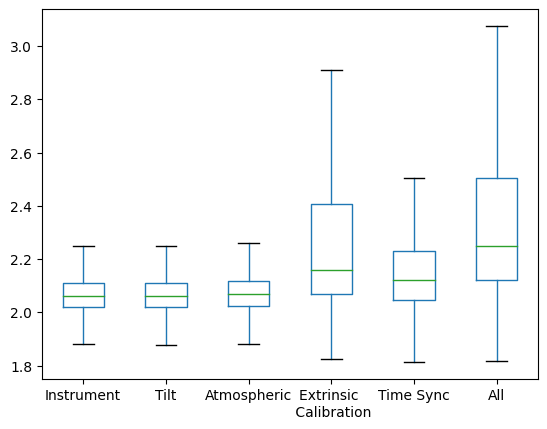

In [ ]:
boxplot = df_fn.boxplot(column=['Instrument','Tilt','Atmospheric','Extrinsic \n Calibration','Time Sync','All'],grid=False,showfliers=False)


plt.show()